# Import package

In [1]:
!pip install ultralytics

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [2]:
from ultralytics import YOLO
import cv2
import torch
import numpy as np
import os
import pandas as pd
import random
import matplotlib.pyplot as plt
import yaml

# 模拟 google.colab.patches 模块（用于本地环境）
try:
    from google.colab.patches import cv2_imshow
except ImportError:
    # 如果无法导入，创建本地替代函数
    def cv2_imshow(img):
        """在本地环境中显示 OpenCV 图片（替代 google.colab.patches.cv2_imshow）"""
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(10, 10))
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.show()

# Visualize the data

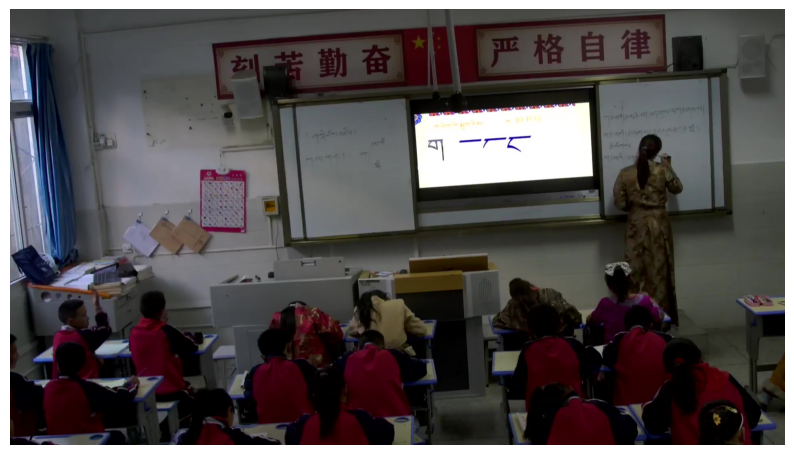

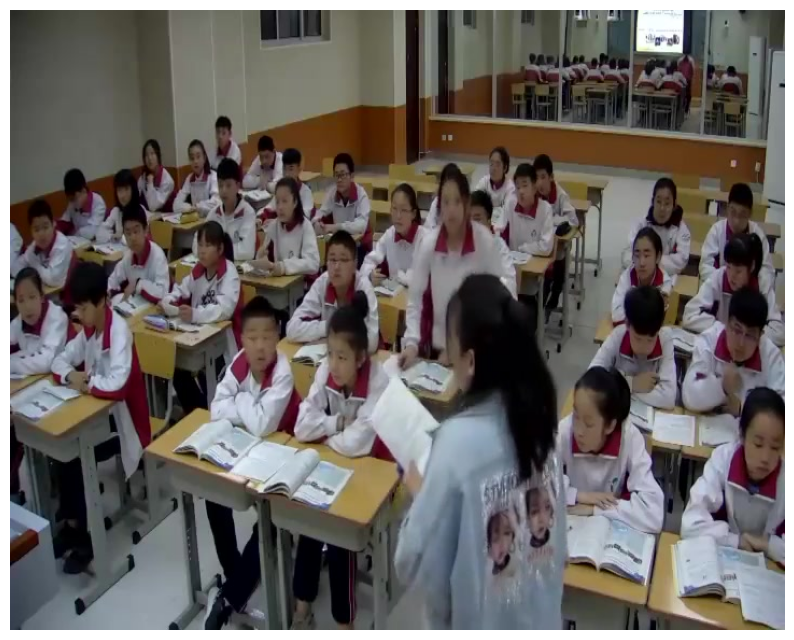

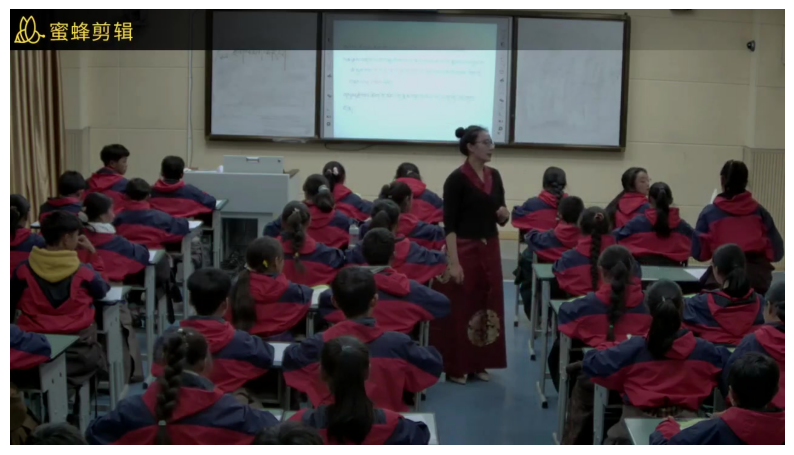

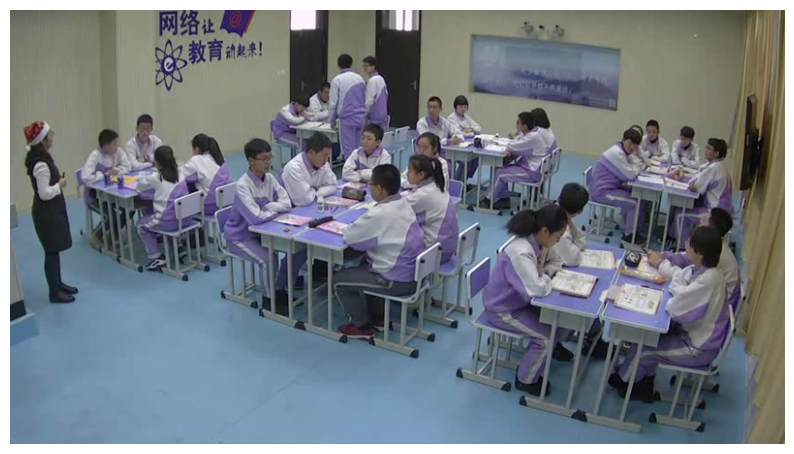

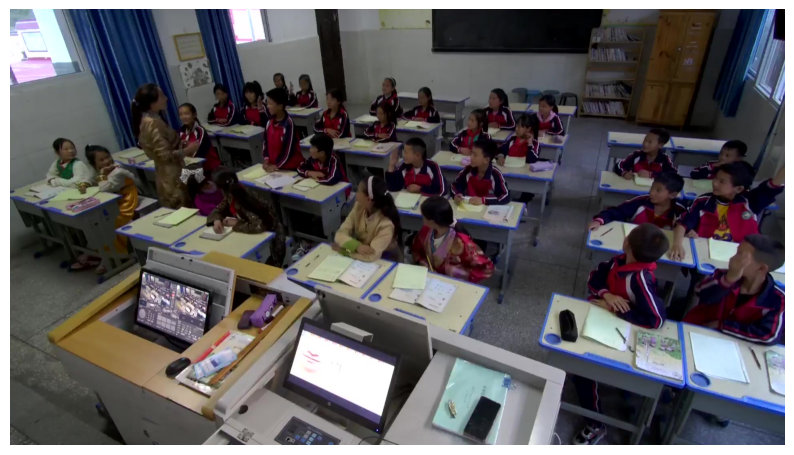

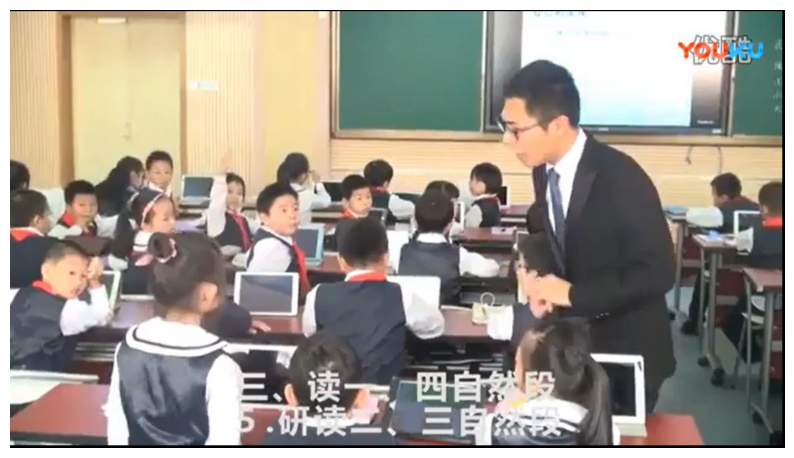

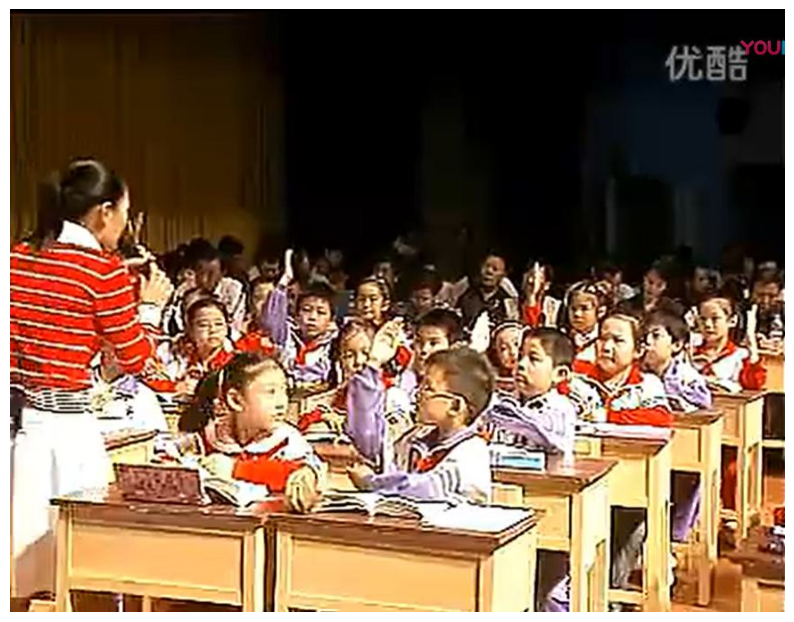

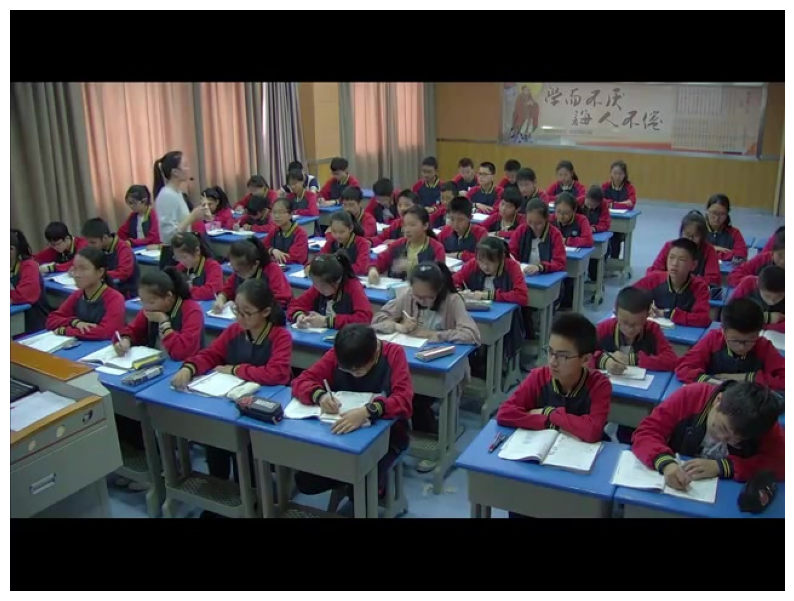

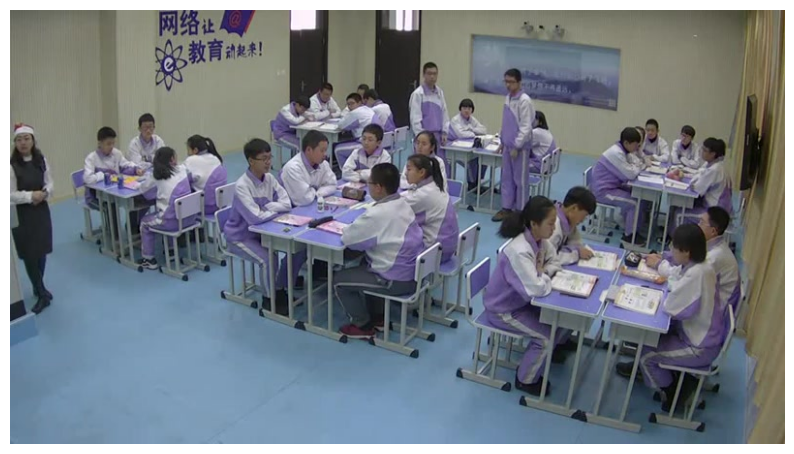

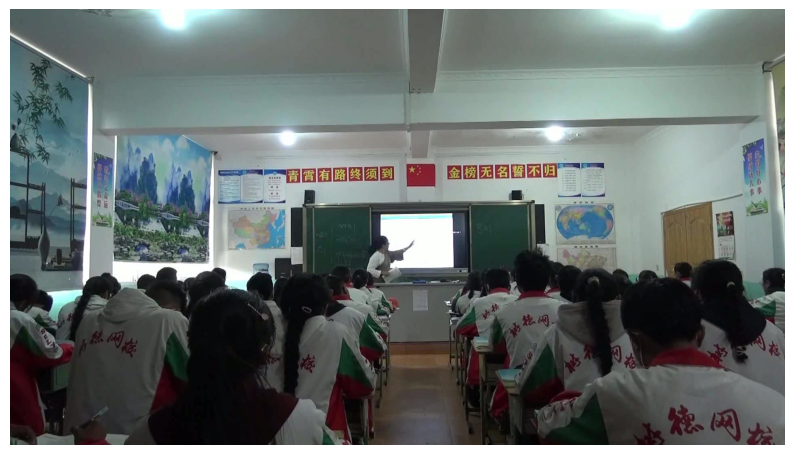

In [3]:
images_dir= "/data/ai-class/datasets/SCB_BowTurnHead/images/train"
#images_dir= "/data/ai-class/datasets/Face_Detection/images/train"

for file in os.listdir(images_dir)[:10]:
    img= cv2.imread(os.path.join(images_dir, file))
    if img is not None:
        cv2_imshow(img)

# Create the yaml file

In [4]:
# data = {
#     "train": "/data/ai-class/datasets/Face_Detection/images/train",
#     "val": "/data/ai-class/datasets/Face_Detection/images/val",
#     "nc": 2,
#     "names": ["0", "1"]
# }

# with open("/data/ai-class/datasets/Face_Detection/data.yaml", "w") as f:  # Open file in write mode
#     yaml.dump(data, f, default_flow_style=False)  # Write data to YAML

data = {
    "train": "/data/ai-class/datasets/SCB_BowTurnHead/images/train",
    "val": "/data/ai-class/datasets/SCB_BowTurnHead/images/val",
    "nc": 2,
    "names": ["BowHead", "TurnHead"]
}

with open("/data/ai-class/datasets/SCB_BowTurnHead/data.yaml", "w") as f:  # Open file in write mode
    yaml.dump(data, f, default_flow_style=False)  # Write data to YAML


In [5]:
# Reading the YAML file
with open("/data/ai-class/datasets/SCB_BowTurnHead/data.yaml", "r") as f:
    loaded_data = yaml.safe_load(f)  # Load YAML as a Python dictionary

# Print the loaded data
print(loaded_data)

# # Reading the YAML file
# with open("/data/ai-class/datasets/Face_Detection/data.yaml", "r") as f:
#     loaded_data = yaml.safe_load(f)  # Load YAML as a Python dictionary

# # Print the loaded data
# print(loaded_data)

{'names': ['BowHead', 'TurnHead'], 'nc': 2, 'train': '/data/ai-class/datasets/SCB_BowTurnHead/images/train', 'val': '/data/ai-class/datasets/SCB_BowTurnHead/images/val'}


# Model training

In [6]:
# cli -> train for 31 epochs
!yolo task= detect mode= train model= yolo11n.pt data= /data/ai-class/datasets/SCB_BowTurnHead/data.yaml epochs= 50 batch= 16 imgsz= 640

# !yolo task= detect mode= train model= yolo11n.pt data= /data/ai-class/datasets/Face_Detection/data.yaml epochs= 50 batch= 16 imgsz= 640

Ultralytics 8.3.234 🚀 Python-3.10.19 torch-2.2.0+cu121 CUDA:0 (Tesla P4, 8109MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/data/ai-class/datasets/SCB_BowTurnHead/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.

Plotting labels to /data/ai-class/runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /data/ai-class/runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       1/50      2.44G      1.524      2.667      1.282          5        640: 100% ━━━━━━━━━━━━ 120/120 2.1it/s 56.5s0.4s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 16/16 3.3it/s 4.8s0.3s
                   all        505       3582       0.18      0.278      0.166      0.081

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    

# Plot train results

In [13]:
os.listdir("/home/zephyr/face-detection/runs/detect/train")

['labels.jpg',
 'BoxF1_curve.png',
 'BoxPR_curve.png',
 'args.yaml',
 'val_batch0_labels.jpg',
 'train_batch0.jpg',
 'train_batch2.jpg',
 'val_batch2_pred.jpg',
 'train_batch33480.jpg',
 'train_batch33481.jpg',
 'BoxR_curve.png',
 'results.csv',
 'results.png',
 'confusion_matrix_normalized.png',
 'val_batch0_pred.jpg',
 'train_batch1.jpg',
 'weights',
 'train_batch33482.jpg',
 'BoxP_curve.png',
 'val_batch2_labels.jpg',
 'val_batch1_pred.jpg',
 'confusion_matrix.png',
 'val_batch1_labels.jpg']

In [14]:
# read results csv
results_csv= pd.read_csv("/home/zephyr/face-detection/runs/detect/train/results.csv")

results_csv.head()

epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1  166.675         1.39647         1.56638         1.22470   
1      2  268.760         1.29987         0.99688         1.11331   
2      3  367.911         1.32821         0.95061         1.13872   
3      4  467.015         1.34361         0.93542         1.15484   
4      5  565.274         1.31287         0.87703         1.14365   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.85178            0.71764           0.79787   
1               0.85901            0.66906           0.76722   
2               0.83104            0.63805           0.71285   
3               0.86345            0.69995           0.78444   
4               0.86414            0.71900           0.80368   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.48950       1.29234       0.98213       1.10442  0.003329   
1              0.47123       1.33931       0.95313       1.15892  0.006531   
2              0.43320       1.39636       1.06696       1.20398  0.009600   
3              0.48552       1.31272       0.82893       1.14851  0.009406   
4              0.50210       1.30200       0.80577       1.14052  0.009208   

     lr/pg1    lr/pg2  
0  0.003329  0.003329  
1  0.006531  0.006531  
2  0.009600  0.009600  
3  0.009406  0.009406  
4  0.009208  0.009208

In [15]:
results_csv.columns

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')

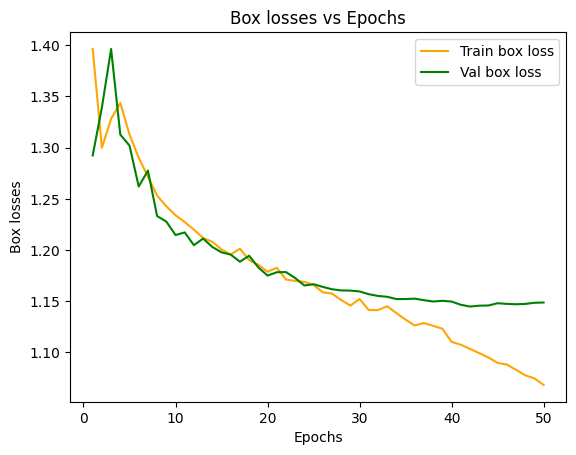

In [17]:
# plot box loss
num_epochs = len(results_csv)
plt.plot(range(1, num_epochs + 1), results_csv["train/box_loss"], color= "orange", label= "Train box loss")
plt.plot(range(1, num_epochs + 1), results_csv["val/box_loss"], color= "green", label= "Val box loss")
plt.xlabel("Epochs")
plt.ylabel("Box losses")
plt.title("Box losses vs Epochs")
plt.legend();

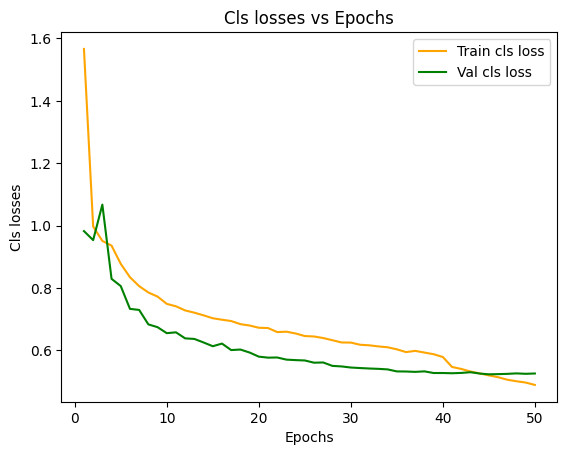

In [18]:
# plot cls loss
num_epochs = len(results_csv)
plt.plot(range(1, num_epochs + 1), results_csv["train/cls_loss"], color= "orange", label= "Train cls loss")
plt.plot(range(1, num_epochs + 1), results_csv["val/cls_loss"], color= "green", label= "Val cls loss")
plt.xlabel("Epochs")
plt.ylabel("Cls losses")
plt.title("Cls losses vs Epochs")
plt.legend();

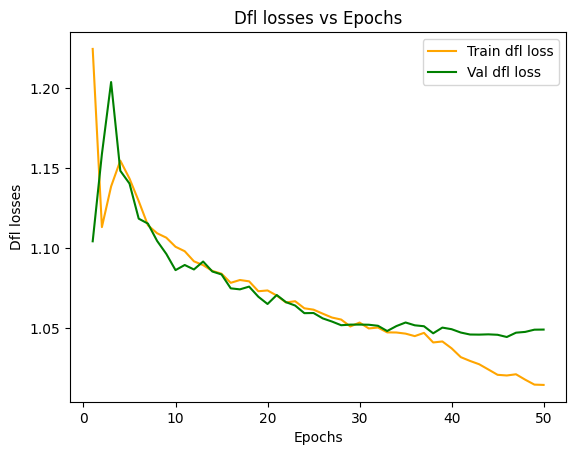

In [19]:
# plot dfl loss
num_epochs = len(results_csv)
plt.plot(range(1, num_epochs + 1), results_csv["train/dfl_loss"], color= "orange", label= "Train dfl loss")
plt.plot(range(1, num_epochs + 1), results_csv["val/dfl_loss"], color= "green", label= "Val dfl loss")
plt.xlabel("Epochs")
plt.ylabel("Dfl losses")
plt.title("Dfl losses vs Epochs")
plt.legend();

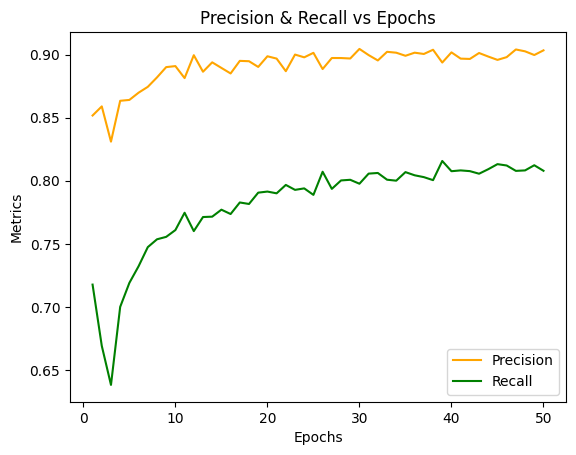

In [20]:
# plot precision and recall
num_epochs = len(results_csv)
plt.plot(range(1, num_epochs + 1), results_csv["metrics/precision(B)"], color= "orange", label= "Precision")
plt.plot(range(1, num_epochs + 1), results_csv["metrics/recall(B)"], color= "green", label= "Recall")
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.title("Precision & Recall vs Epochs")
plt.legend();

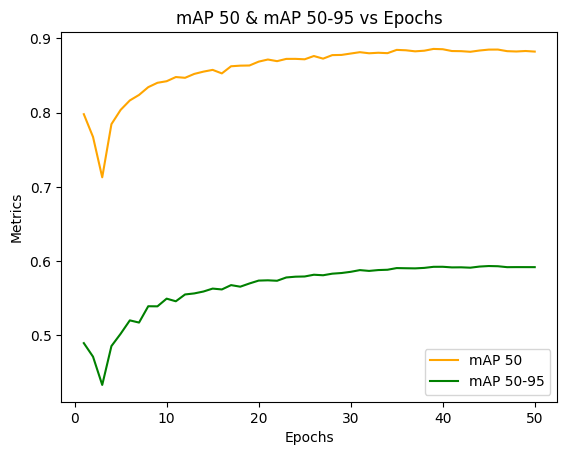

In [21]:
# plot map 50 and map 50-95
num_epochs = len(results_csv)
plt.plot(range(1, num_epochs + 1), results_csv["metrics/mAP50(B)"], color= "orange", label= "mAP 50")
plt.plot(range(1, num_epochs + 1), results_csv["metrics/mAP50-95(B)"], color= "green", label= "mAP 50-95")
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.title("mAP 50 & mAP 50-95 vs Epochs")
plt.legend();

# Validation

In [22]:
os.listdir("/home/zephyr/face-detection/runs/detect/train/weights")

['best.pt', 'last.pt']

In [23]:
# cli
!yolo task= detect mode= val model= /home/zephyr/face-detection/runs/detect/train/weights/best.pt data= /home/zephyr/face-detection/data.yaml

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.1+cu128 CUDA:0 (NVIDIA L4, 22593MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2775.0±653.8 MB/s, size: 244.1 KB)
val: Scanning /home/zephyr/face-detection/dataset/labels/val.cache... 3347 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 3347/3347 36.6Mit/s 0.0ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 210/210 12.4it/s 16.9s<0.1s
                   all       3347      10299      0.896      0.813      0.885      0.594
Speed: 0.5ms preprocess, 1.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to /home/zephyr/face-detection/runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


# Plot validation results

In [24]:
os.listdir("/home/zephyr/face-detection/runs/detect/val")

['BoxF1_curve.png',
 'BoxPR_curve.png',
 'val_batch0_labels.jpg',
 'val_batch2_pred.jpg',
 'BoxR_curve.png',
 'confusion_matrix_normalized.png',
 'val_batch0_pred.jpg',
 'BoxP_curve.png',
 'val_batch2_labels.jpg',
 'val_batch1_pred.jpg',
 'confusion_matrix.png',
 'val_batch1_labels.jpg']

[ WARN:0@14265.317] global loadsave.cpp:275 findDecoder imread_('/home/zephyr/face-detection/runs/detect/val/P_curve.png'): can't open/read file: check file path/integrity
[ WARN:0@14265.317] global loadsave.cpp:275 findDecoder imread_('/home/zephyr/face-detection/runs/detect/val/PR_curve.png'): can't open/read file: check file path/integrity
[ WARN:0@14265.318] global loadsave.cpp:275 findDecoder imread_('/home/zephyr/face-detection/runs/detect/val/R_curve.png'): can't open/read file: check file path/integrity
[ WARN:0@14265.318] global loadsave.cpp:275 findDecoder imread_('/home/zephyr/face-detection/runs/detect/val/F1_curve.png'): can't open/read file: check file path/integrity


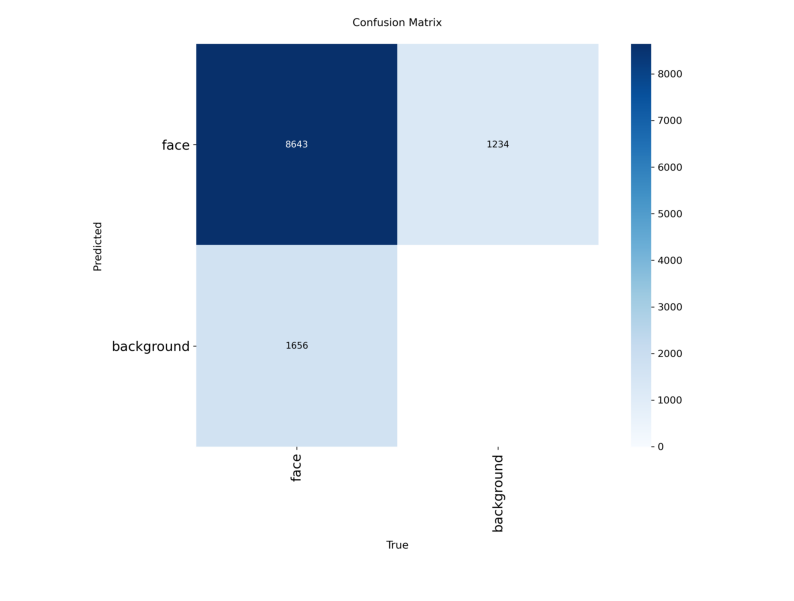

In [25]:
val_out_dir= "/home/zephyr/face-detection/runs/detect/val"

# p curve, pr curve, r curve, f1 curve, confussion matrix
files= ['P_curve.png', 'PR_curve.png', 'R_curve.png', 'F1_curve.png', 'confusion_matrix.png']

for file in files:
    img= cv2.imread(os.path.join(val_out_dir, file))
    if img is not None:
        cv2_imshow(img)

# Test evaluation

In [ ]:
!yolo task= detect mode= predict conf= 0.25 source= /home/zephyr/face-detection/dataset/images/val model= /home/zephyr/face-detection/runs/detect/train/weights/best.pt

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.1+cu128 CUDA:0 (NVIDIA L4, 22593MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

Traceback (most recent call last):
  File "/home/zephyr/miniconda3/envs/yolo/bin/yolo", line 7, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/home/zephyr/miniconda3/envs/yolo/lib/python3.12/site-packages/ultralytics/cfg/__init__.py", line 985, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/zephyr/miniconda3/envs/yolo/lib/python3.12/site-packages/ultralytics/engine/model.py", line 535, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/zephyr/miniconda3/envs/yolo/lib/python3.12/site-packages/ultralytics/engine/predictor.py", line 244, in predict_cli
    for _ in gen:  # sour

In [ ]:
# see the predicted images
test_res_dir= "/home/zephyr/face-detection/runs/detect/predict"

for file in os.listdir(test_res_dir)[:10]:
    img= cv2.imread(os.path.join(test_res_dir, file))
    if img is not None:
        cv2_imshow(img)